In [43]:
#Input y
y_g = 7

In [44]:
#Importing libraries
import numpy as np
import pandas as pd
import math

In [45]:
#reading data file
filename = 'abc.txt'
data = np.loadtxt(filename,delimiter='\t')

In [46]:
#Separating X and Y columns
x = np.array(data[0:,0])
y = np.array(data[0:,1])
n = x.shape[0]

In [47]:
#langragian Interpolation function
def inverselangrageinterpolation(y_g):
    l = np.ones(n)
    lx = np.ones(n)
    for i in range(0,n):                                 #Calculater L*y
        for ii in range(0,n):                            #Calculates L
            if ii != i:
                l[i] = (y_g-y[ii])/(y[i]-y[ii])*l[i]     #heart of the program
        lx[i] = l[i]*x[i]  
    y_g = np.sum(lx)

    #college table
    #1st row is l1,L2,L3..
    #2nd row is x1*l1, x2*L2 ...
    matrix = np.array((l,lx)) 
    print(matrix)
    #print('x=',y_g, '\t','y=',y_g)
    return y_g

In [48]:
inverselangrageinterpolation(y_g)

[[ 0.41551075  0.58979103  0.00251606 -0.00781784]
 [ 0.41551075  1.17958205  0.01054757 -0.03908919]]


1.5665511880462248

[[ 1.  0.  0. -0.]
 [ 1.  0.  0. -0.]]
[[-1.2875949   2.1285987  -0.06307643  0.22207264]
 [-1.2875949   4.2571974  -0.26442272  1.11036318]]
[[-1.07702412  1.48523435 -0.15123145  0.74302122]
 [-1.07702412  2.97046869 -0.63397737  3.71510611]]
[[ 0. -0.  0.  1.]
 [ 0. -0.  0.  5.]]


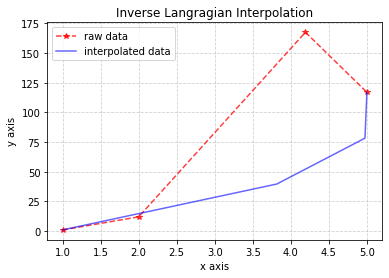

<Figure size 20000x10000 with 0 Axes>

In [50]:
from matplotlib import pyplot as plt

y_interpolation = np.linspace(y[0],y[y.shape[0]-1],y.shape[0])
x_interpolation = np.ones(y_interpolation.shape[0])
for i in range (0,x_interpolation.shape[0]):
    x_interpolation[i] = inverselangrageinterpolation(y_interpolation[i])

plt.plot(x, y,'r*--',alpha = 0.75,label = 'raw data')
plt.plot(x_interpolation,y_interpolation,'b-',alpha = 0.6, label = 'interpolated data')

plt.title('Inverse Langragian Interpolation')
plt.xlabel('x axis') 
plt.ylabel('y axis') 
plt.grid(alpha =.6, linestyle ='--')
plt.legend()
plt.figure(figsize=(20,10),dpi=1000)

plt.show()